## Spam Classification
In this notebook we demonstrate how to classify if an image is SPAM or HAM using the SMS Spam Collection Dataset which can be found [here](https://www.kaggle.com/uciml/sms-spam-collection-dataset#spam.csv)


In [1]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install pandas==1.1.5
!pip install scikit-learn==0.21.3
!pip install numpy==1.19.5
!pip install wget==3.2
!pip install fastai==1.0.60
!pip install spacy==2.2.4

# ===========================

     |████████████████████████████████| 6.7MB 5.1MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=f4c7b394dd96eeca0186c0e5cbdaf511cd752fddd0c6d856a10bc76984528801
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
     |████████████████████████████████| 245kB 6.6MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

# try:
#     import google.colab
#     !curl  https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/ch4-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError:
#     !pip install -r "ch4-requirements.txt"

# ===========================

In [3]:
import pandas as pd
import wget
import os
from zipfile import ZipFile

In [4]:
try :
    from google.colab import files 
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
    !unzip smsspamcollection.zip
    df = pd.read_csv('SMSSpamCollection', sep='\t',  header=None, names=['target', 'text'])
except ModuleNotFoundError :
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
    path = os.getcwd()+'\Data'
    wget.download(url,path)
    temp=path+'\smsspamcollection.zip'          
    file = ZipFile(temp)           
    file.extractall(path)          
    file.close()
    df = pd.read_csv(path + '\SMSSpamCollection', sep='\t',  header=None, names=['target', 'text'])

--2021-07-18 06:19:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203415 (199K) [application/x-httpd-php]
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z 100%[===================>] 198.65K   774KB/s    in 0.3s    

2021-07-18 06:19:34 (774 KB/s) - ‘smsspamcollection.zip’ saved [203415/203415]

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


In [5]:
import fastai
from fastai import *
from fastai.text import *
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [6]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
display(df.shape) #Number of rows (instances) and columns in the dataset
df["target"].value_counts()/df.shape[0] #Class distribution in the dataset

(5572, 2)

ham     0.865937
spam    0.134063
Name: target, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_train, df_test = train_test_split(df,stratify = df['target'], test_size = 0.2, random_state = 2020)

In [9]:
df_train.shape,df_test.shape

((4457, 2), (1115, 2))

In [10]:
# Language model data 
data_lm = TextLMDataBunch.from_df(train_df = df_train, valid_df = df_test, path = "")  

# Classifier model data 
data_class = TextClasDataBunch.from_df(path = "", train_df = df_train, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [11]:
df_test

,target,text
3815,ham,Can. Dunno wat to get 4 her...
399,ham,"Good evening Sir, Al Salam Wahleykkum.sharing ..."
4778,ham,Sorry completely forgot * will pop em round th...
2319,ham,On the way to office da..
211,ham,"What's up bruv, hope you had a great break. Do..."
...,...,...
3752,ham,"Haha... Sounds crazy, dunno can tahan anot..."
5130,ham,Any way where are you and what doing.
5306,ham,Ill be at yours in about 3 mins but look out f...
5314,spam,Get the official ENGLAND poly ringtone or colo...


TextLMDataBunch applies some text preprocessing tasks to help the algorithm perform better. Altough we commonly remove stoopwords and punctuations, here we do not do it. This model can handle semantics, deleting such information might do more harm than good with respect to accuracy

Now lets look at our training data


In [12]:
data_lm.show_batch()

idx,text
0,". xxmaj mark is taking forever to pick up my prescription and the pain is coming back . xxbos xxmaj your credits have been xxunk up for http : / / xxunk xxmaj your renewal xxmaj pin is xxunk xxbos xxmaj loan for any purpose £ 500 - £ 75,000 . xxmaj homeowners + xxmaj tenants welcome . xxmaj have you been previously refused ? xxmaj we can still help"
1,"b going to esplanade fr home ? xxbos somewhere out there beneath the pale moon light someone think in of u some where out there where dreams come true ... goodnite & & sweet dreams xxbos xxmaj well that must be a pain to catch xxbos sry ca n't talk on phone , with parents xxbos xxmaj hope you are having a good week . xxmaj just checking in xxbos"
2,"on a xxup reality xxup fantasy xxup show call now = 08707509020 xxmaj just 20p per min xxup ntt xxmaj ltd , xxup po xxmaj box 1327 xxmaj croydon xxup cr9 xxup 5wb 0870 is a national = rate call xxbos i think your xxunk is , but not 100 xxunk sure . xxbos xxmaj all e best 4 ur driving tmr :-) xxbos xxmaj finished class where are you"
3,"is * rite u put xxunk 10 xxunk mnth is that all ? xxbos xxmaj have you been xxunk your xxunk ? xxbos xxmaj what year . xxmaj and how many miles . xxbos , how 's things ? xxmaj just a quick question . xxbos xxmaj tell your friends what you plan to do on xxmaj valentines day @ < xxup url > xxbos * xxmaj was really good"
4,message . xxmaj this is a final contact attempt . xxmaj you have important messages waiting out our customer claims xxunk . xxmaj expires 13 / 4 / 04 . xxmaj call xxunk xxup now ! xxbos xxmaj miles and smiles r made frm same letters but do u know d difference .. ? smile on ur face keeps me happy even though i am miles away from u ..


Those 'xxmaj','xxbos', 'xxup' etc are all special tokens for the NN. xxbos stands for begin of sentence, xxmaj indicates that the first letter of the next word is in capital letter, 'xxup' is used to indicate the entire  next word is in captital letters. You can view the entire set of tokens [here.](https://docs.fast.ai/text.transform.html)

In [13]:
model = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained = True, drop_mult=0.5)

We will use a pretrained model. You can learn more about it [here.](https://docs.fast.ai/text.models.html#Language-model-modules)

Now lets test our language model. Its is giving sensible outputs as it is pre trained on wiki corpus. 


In [14]:
for i in range(10):
    print(model.predict("The food is", n_words=15))

The food is good , and to whatever effect is the food or food supply , it is
The food is used for these issues and is found in a number of books testing and of
The food is English 's work to remove the Chinese food from its walls , and
The food is 200 in ( 350 mm ) , if not less than between " except for
The food is South American , and e - effect Sunday ya ya ya ya ! ! ! !
The food is delivered by a snake , or after being put in a red dress for dinner
The food is last seen in the London - area community " Kids ' Club
The food is an food choice , usually with a diet of slow and sunny and fast .
The food is cold further away , which was gave ;_; and some other food by British
The food is from the back of a bed and is used to express the needs of both


We will now need to fine tune our model for our particular task. <br>

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 5.25E-02


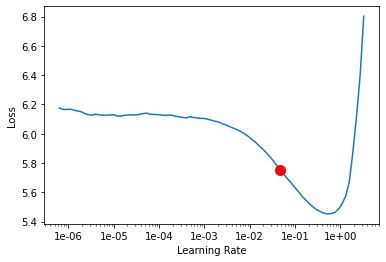

In [15]:
model.lr_find() # you can find more details about this at https://docs.fast.ai/basic_train.html
model.recorder.plot(suggestion=True)

In [16]:
model.fit_one_cycle(4, max_lr= 5e-02)#you can freeze and unfreeze different layers and by doing so we can have different lr for each layer
#for freezing and unfreezing code you can refer https://docs.fast.ai/text.html


epoch,train_loss,valid_loss,accuracy,time
0,5.237098,3.849046,0.257143,04:05
1,4.460004,3.906193,0.257143,04:03
2,3.914357,3.752476,0.285714,04:03
3,3.516106,3.735108,0.271429,04:02


In [17]:
for i in range(10):
    print(model.predict("The food is", n_words=15))

The food is really useful , but a new question may take 2 contact him , since the
The food is cheap , cheap , cheap , hard to run a ne way and call
The food is subscribed to the WORLD World & World World Club
The food is a sun wine , wine , wine , wine sense , noline rentl .
The food is shit .. xxbos Slept Bray , Wicklow , Eire and a
The food is really small in south tampa , preferably south near railway good 13 + 6 days
The food is really nice - ur free ... xxbos You will be kept informed that the
The food is normally used to deliver through sufficient movies . However , .@ xxbos & xxbos
The food is normally eat for a top 4 a . Click on the whole 1956669 mac
The food is now perfect . No already thought smth ho , he wanted it to be


Note that now the model is predicting ':)' and other such characters which can generally be seen in SMS messages. With further more fine tuning and running it for more cyles you can get the model to predict more characters which are found in SMS messages.